# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

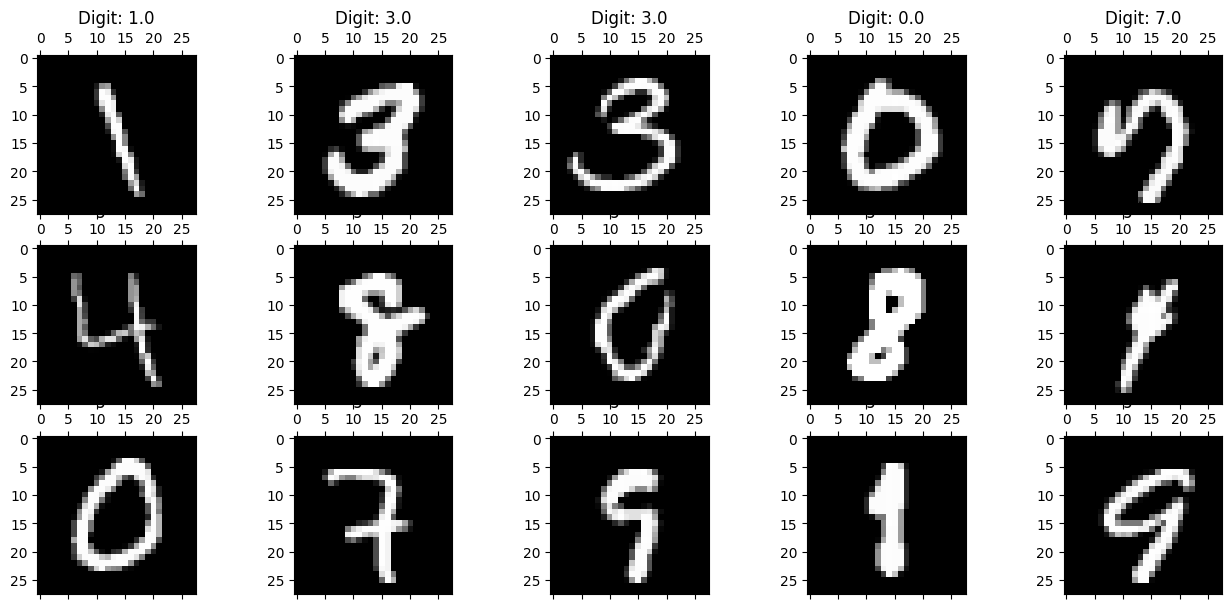

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

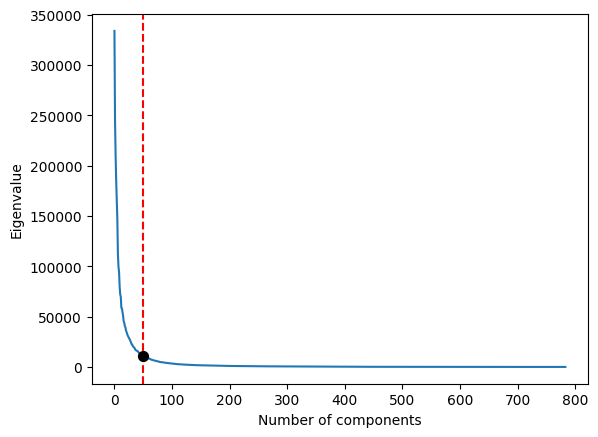

Elbow point: (49, 10990.23)


In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
eigenvalues = pca.explained_variance_

plt.plot(eigenvalues)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')

# KneeLocator를 사용하여 elbow point의 위치를 찾습니다.
kneedle = KneeLocator(range(len(eigenvalues)), eigenvalues, S=1.0, curve='convex', direction='decreasing')
knee_idx = kneedle.knee
plt.axvline(x=knee_idx, color='red', linestyle='--')  # elbow point

# 교점의 위치를 표시합니다.
x = [knee_idx]
y = [eigenvalues[knee_idx]]
plt.scatter(x, y, color='black', s=50, zorder=3)

plt.show()

# 교점의 위치
print('Elbow point: ({}, {:.2f})'.format(knee_idx, eigenvalues[knee_idx]))

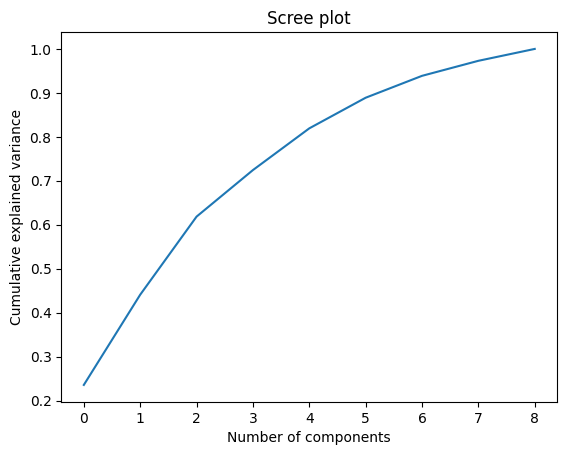

In [26]:
# LDA 모델 훈련 및 변환
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

# 분산 비율 계산
variance_ratio = lda.explained_variance_ratio_

# Scree plot 그리기
plt.plot(np.cumsum(variance_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot')
plt.show()

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [27]:
# RandomForest 분류기와 Support Vector Machine의 분류기를 활용
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

# 시간을 재고, 성능 점수를 내주는 함수 (3번사용됨)
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    test_score = model.score(X_test, y_test)
    test_time = time.time() - start_time

    return train_time, test_score

In [31]:
# 랜덤 포레스트와 SVM 모델 학습 및 성능 평가
dataset_names = ['Original Data', 'PCA Reduced Data', 'LDA Reduced Data']
train_data = [X_train, X_train_pca, X_train_lda]
label_data = [y_train] * 3
test_data = [X_test, X_test_pca, X_test_lda]
test_label_data = [y_test] * 3

# 모델은 두개 사용
models = [RandomForestClassifier(), SVC()]
model_train_time = []
model_test_score = []

for i in range(len(dataset_names)):
    for model_n in range(2):
        train_time, test_score = train_and_evaluate(models[model_n], train_data[i], label_data[i], test_data[i], test_label_data[i])
        
        model_train_time.append(train_time)
        model_test_score.append(test_score)

C:\Users\dksu4\AppData\Local\Temp\ipykernel_111656\1795034118.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dksu4\AppData\Local\Temp\ipykernel_111656\1795034118.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [32]:
# 결과 출력
for i in range(len(dataset_names)):
    for model_n in range(2):
        print(f'dataset_name : {dataset_names[i]}, model : {models[model_n]}')
        print("Training time: {:.4f} sec".format(model_train_time[2*i]))
        print("Test accuracy: {:.4f}".format(model_test_score[2*i]))
        print("Training time: {:.4f} sec".format(model_train_time[2*i+1]))
        print("Test accuracy: {:.4f}".format(model_test_score[2*i+1]))
        print()

dataset_name : Original Data, model : RandomForestClassifier()
Training time: 33.0721 sec
Test accuracy: 0.9664
Training time: 158.6941 sec
Test accuracy: 0.9774

dataset_name : Original Data, model : SVC()
Training time: 33.0721 sec
Test accuracy: 0.9664
Training time: 158.6941 sec
Test accuracy: 0.9774

dataset_name : PCA Reduced Data, model : RandomForestClassifier()
Training time: 263.0374 sec
Test accuracy: 0.9026
Training time: 176.9313 sec
Test accuracy: 0.9806

dataset_name : PCA Reduced Data, model : SVC()
Training time: 263.0374 sec
Test accuracy: 0.9026
Training time: 176.9313 sec
Test accuracy: 0.9806

dataset_name : LDA Reduced Data, model : RandomForestClassifier()
Training time: 26.6517 sec
Test accuracy: 0.9069
Training time: 9.0442 sec
Test accuracy: 0.9115

dataset_name : LDA Reduced Data, model : SVC()
Training time: 26.6517 sec
Test accuracy: 0.9069
Training time: 9.0442 sec
Test accuracy: 0.9115



특정한 틀 없이 자유롭게 해주시면 됩니다!